In [74]:

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models
# from keras.layers import Dense
#from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

## importing libraries

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import time
from sklearn import preprocessing
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import sklearn.metrics
import math
from numpy import mean
from numpy import std

from sklearn.metrics import mean_squared_error, r2_score


print('Done importing libraries')

Done importing libraries


In [75]:
## Functions used throughout code
from sklearn.model_selection import cross_validate

def cross_validate_scores(model_var, X_var, y_var):
    scoring_metrics = ["explained_variance", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error", "neg_median_absolute_error", "r2"] #"neg_mean_squared_log_error"
    scores = cross_validate(model_var, X_var, y_var, scoring=scoring_metrics, cv=10)
    
    #calculate adj r^2
    n = len(X_train)
    k = len(X.columns)
    adj_r2_list = []
    for r2 in scores["test_r2"]:
        adj_r2 = 1-(((1-r2)*(n-1))/(n-k-1))
        adj_r2_list.append(adj_r2)   
    scores["adj_r2"] = adj_r2_list
   
    print(scores["test_r2"])
    for key in scores:
        scores[key] = round(mean(scores[key]), 5)
   
    return scores


def resid_plot(model_var, X_train_var, X_test_var):
    #define plot
    fig, ax = plt.subplots()
    plt.style.use("fivethirtyeight")

    #plot reside in train data
    plt.scatter(model_var.predict(X_train_var), model_var.predict(X_train_var) - y_train, color = "blue", s = 5, label = 'Train data')
    
    #plot resid in test data
    plt.scatter(model_var.predict(X_test_var), model_var.predict(X_test_var) - y_test, color = "red", s = 5, label = 'Test data')
    
    #plot zero error line for easier visibility
    plt.hlines(y = 0, xmin = 0, xmax = ax.get_xbound()[1], linewidth = 1, color = "black")
    
    #plot legend and title
    plt.legend(loc = 'best')
    plt.title("Residual errors")

    #show plot
    plt.show()

In [76]:
df = pd.read_csv("../Data/Bangkok2021.csv")
df = df.dropna()
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6629 entries, 0 to 6628
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       6629 non-null   object 
 1   Time       6629 non-null   object 
 2   O3         6629 non-null   float64
 3   PM2.5      6629 non-null   float64
 4   PM10       6629 non-null   float64
 5   CO         6629 non-null   float64
 6   SO2        6629 non-null   float64
 7   NO2        6629 non-null   float64
 8   Temp       6629 non-null   float64
 9   RHum       6629 non-null   float64
 10  WSpd       6629 non-null   float64
 11  O3_P1      6629 non-null   float64
 12  O3_P4      6629 non-null   float64
 13  O3_P8      6629 non-null   float64
 14  O3_P24     6629 non-null   float64
 15  PM2.5_P1   6629 non-null   float64
 16  PM2.5_P4   6629 non-null   float64
 17  PM2.5_P8   6629 non-null   float64
 18  PM2.5_P24  6629 non-null   float64
dtypes: float64(17), object(2)
memory usage: 1.0+ MB


In [77]:
X = df[["O3", "PM2.5", "PM10", "CO", "SO2", "NO2", "Temp", "RHum", "WSpd"]]

y = df['O3_P24']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.1)

print("Training Dataset Size: {} trials".format(X_train.shape[0]))
print("Testing Dataset Size: {} trial".format(X_test.shape[0]))

print('Variables Defined')

Training Dataset Size: 5966 trials
Testing Dataset Size: 663 trial
Variables Defined


In [78]:
from sklearn import preprocessing
#robust scaler
scaler = preprocessing.RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_scaled = scaler.fit_transform(X)

#minmax
# X_train_scaled = preprocessing.minmax_scale(X_train, feature_range = (0,1))
# X_test_scaled =  preprocessing.minmax_scale(X_test, feature_range = (0,1))
# X_scaled =  preprocessing.minmax_scale(X, feature_range = (0,1))

#StandardScaler
# scaler = preprocessing.StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
# X_scaled = scaler.fit_transform(X)

print('Data Scaled')

Data Scaled


Coefficients: 
Intercept: 0.01542787558354049
O3: 0.012277020304606668
PM2.5: 0.0
PM10: 0.0005052763579915485
CO: 0.000918956111265381
SO2: 0.0
NO2: 0.0007187704112439345
Temp: 0.0004858795033664493
RHum: 0.0
WSpd: 0.0003699734098224137
Scores Training
[0.20742439 0.55597013 0.25102614 0.19973293 0.35829107 0.17992919
 0.5952515  0.64413295 0.54258014 0.64372864]
fit_time: 0.0046
score_time: 0.0031
test_explained_variance: 0.42838
test_neg_mean_absolute_error: -0.00614
test_neg_mean_squared_error: -7e-05
test_neg_root_mean_squared_error: -0.00812
test_neg_median_absolute_error: -0.00484
test_r2: 0.41781
adj_r2: 0.41693


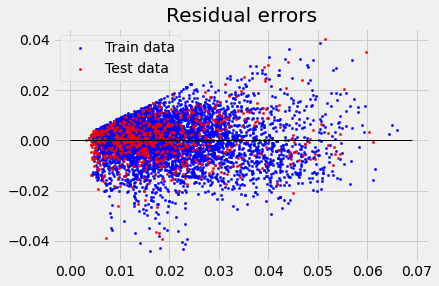

In [79]:
#multiple linear regression
from sklearn.linear_model import LinearRegression


multi_lin_reg = LinearRegression(positive=True)
multi_lin_reg.fit(X_train_scaled, y_train)

#Print Coefficients and Weight
print("Coefficients: ")
print("Intercept: " + str(multi_lin_reg.intercept_))
for i in range(len(X.columns)):
    print(X.columns[i] + ": " + str(multi_lin_reg.coef_[i]))

print("Scores Training")
multi_reg_scores = cross_validate_scores(multi_lin_reg, X_scaled, y)
for key in multi_reg_scores:
    print(key + ": " + str(multi_reg_scores[key]))

resid_plot(multi_lin_reg, X_train_scaled, X_test_scaled)


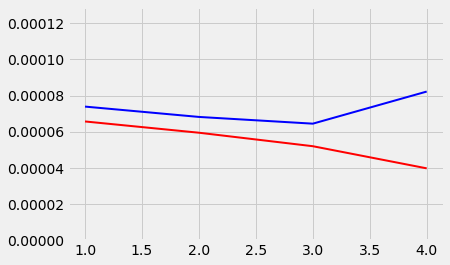

Degrere of Polynomial: 3
Scores Training
[ 0.22463681  0.55497564  0.27345495  0.22936581  0.35305373 -0.10288471
  0.56269455  0.58660233  0.4696162   0.62901712]
fit_time: 0.34535
score_time: 0.00285
test_explained_variance: 0.39238
test_neg_mean_absolute_error: -0.00632
test_neg_mean_squared_error: -8e-05
test_neg_root_mean_squared_error: -0.00845
test_neg_median_absolute_error: -0.00499
test_r2: 0.37805
adj_r2: 0.37711


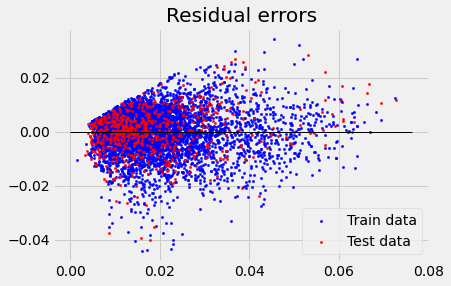

In [80]:
## polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def poly_fit(n):
  train_mse = []
  test_mse = []
  for i in range(1,n+1):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly_train = poly_reg.fit_transform(X_train_scaled)
    X_poly_test = poly_reg.fit_transform(X_test_scaled)

    linreg_poly = LinearRegression()
    linreg_poly.fit(X_poly_train, y_train)
    train_mse.append((mean_squared_error(y_train, linreg_poly.predict(X_poly_train))))
    test_mse.append((mean_squared_error(y_test, linreg_poly.predict(X_poly_test))))
  plt.plot(np.arange(1,n+1,1), train_mse, color="red", linewidth = 2)
  plt.plot(np.arange(1,n+1,1), test_mse, color="blue", linewidth = 2)
  plt.ylim(0, 2*min(test_mse))
  plt.style.use("fivethirtyeight")
  plt.show()
  return test_mse.index(min(test_mse[1:])) + 1 #returns the best degree train

degree = poly_fit(4)
print("Degrere of Polynomial: " + str(degree))
poly_reg = PolynomialFeatures(degree=degree)
X_poly = poly_reg.fit_transform(X_scaled)
X_train_poly = poly_reg.fit_transform(X_train_scaled)
X_test_poly = poly_reg.fit_transform(X_test_scaled)


linreg_poly = LinearRegression(positive= True)
linreg_poly.fit(X_train_poly, y_train)

print("Scores Training")
poly_reg_scores = cross_validate_scores(linreg_poly, X_poly, y)
for key in poly_reg_scores:
    print(key + ": " + str(poly_reg_scores[key]))

resid_plot(linreg_poly, X_train_poly, X_test_poly)

Coefficients: 
Intercept: 0.01342207406914539
9
O3: 0.011690211104299263
PM2.5: 0.0
PM10: 0.0013098924164634653
CO: 0.00011780263012805807
SO2: 0.0
NO2: 0.0
Temp: 0.0010918922868659142
RHum: 0.0
WSpd: 0.000765411965757347
Scores Training
[0.18430348 0.53215125 0.27606868 0.14906832 0.39590861 0.21910479
 0.57285527 0.59408013 0.49854796 0.60643225]
fit_time: 0.16915
score_time: 0.0022
test_explained_variance: 0.43057
test_neg_mean_absolute_error: -0.00616
test_neg_mean_squared_error: -7e-05
test_neg_root_mean_squared_error: -0.0083
test_neg_median_absolute_error: -0.00472
test_r2: 0.40285
adj_r2: 0.40195


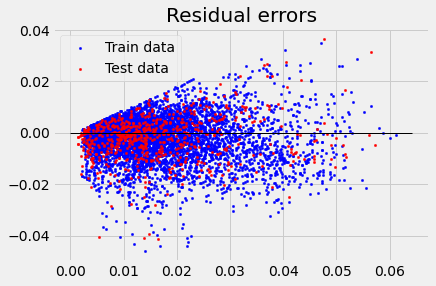

In [81]:
## RANSAC

from sklearn.linear_model import RANSACRegressor, LinearRegression

ransac_reg = RANSACRegressor(LinearRegression(positive=True), random_state = 42)
ransac_reg.fit(X_train_scaled, y_train)

#Print Coefficients and Weight
print("Coefficients: ")
print("Intercept: " + str(ransac_reg.estimator_.intercept_))
print(len(ransac_reg.estimator_.coef_))
for i in range(len(X.columns)):
    print(X.columns[i] + ": " + str(ransac_reg.estimator_.coef_[i]))

print("Scores Training")
ransac_reg_scores = cross_validate_scores(ransac_reg, X_scaled, y)
for key in ransac_reg_scores:
    print(key + ": " + str(ransac_reg_scores[key]))

resid_plot(ransac_reg, X_train_scaled, X_test_scaled)



Tree: 
aaa
Scores Training
[0.18535981 0.41925038 0.18356845 0.12620857 0.2468342  0.16475454
 0.54668348 0.56177325 0.54592468 0.60899293]
fit_time: 0.01647
score_time: 0.00305
test_explained_variance: 0.37465
test_neg_mean_absolute_error: -0.0064
test_neg_mean_squared_error: -8e-05
test_neg_root_mean_squared_error: -0.00851
test_neg_median_absolute_error: -0.00498
test_r2: 0.35894
adj_r2: 0.35797


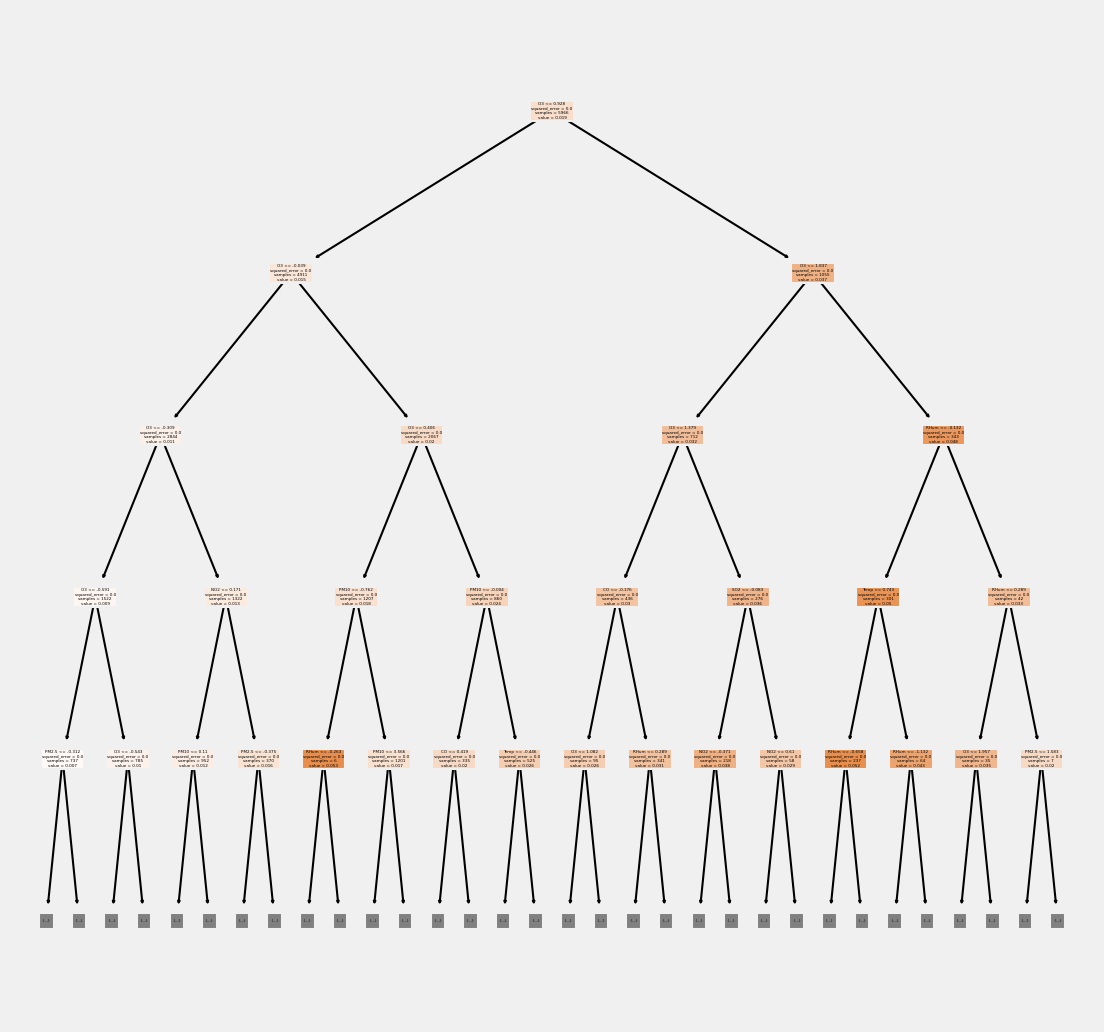

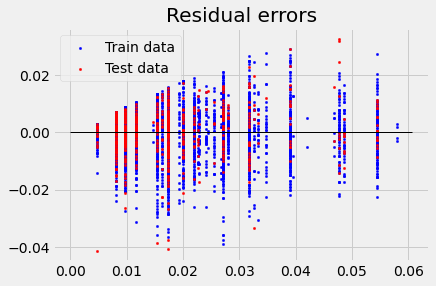

In [82]:
## Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


decision_tree_reg = DecisionTreeRegressor(random_state = 42, max_depth = 5)
decision_tree_reg.fit(X_train_scaled, y_train)


#Print Coefficients and Weight
print("Tree: ")

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_reg, max_depth = 4, feature_names = X.columns, filled = True)

print("aaa")
# dot_data = tree.export_graphviz(decision_tree_reg,out_file=None,feature_names=X.columns)
# graph = graphviz.Source(dot_data)
# graph.render("image",view=True)

# import export_graphviz
# from sklearn.tree import export_graphviz 
  
# # export the decision tree to a tree.dot file
# # for visualizing the plot easily anywhere
# export_graphviz(decision_tree_reg, out_file ='tree.dot',
#                feature_names =X.columns, view=True) 

print("Scores Training")
decision_tree_reg_scores = cross_validate_scores(decision_tree_reg, X_scaled, y)
for key in decision_tree_reg_scores:
    print(key + ": " + str(decision_tree_reg_scores[key]))


resid_plot(decision_tree_reg, X_train_scaled, X_test_scaled)

Scores Training
[0.25766763 0.49203168 0.22333291 0.19808771 0.29172649 0.23220604
 0.54197546 0.63456204 0.58749816 0.65296547]
fit_time: 3.45907
score_time: 0.03614
test_explained_variance: 0.42339
test_neg_mean_absolute_error: -0.00615
test_neg_mean_squared_error: -7e-05
test_neg_root_mean_squared_error: -0.00813
test_neg_median_absolute_error: -0.00486
test_r2: 0.41121
adj_r2: 0.41032


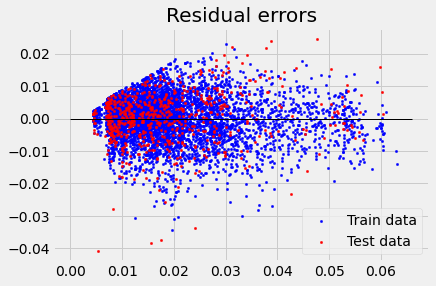

Tree: 


In [84]:
## Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

random_forest_reg = RandomForestRegressor(random_state = 42, max_depth = 7, n_estimators = 300)
random_forest_reg.fit(X_train_scaled, y_train)

# random_forest = RandomForestRegressor()
# random_forest.fit(X_train_scaled, y_train)
# ### Grid Search ###
# num_leafs = [1,2,4,6,10]

# parameters = [{'n_estimators' : range(100,400,25),
#              'max_depth': range(1,10,2),
#              'min_samples_leaf':num_leafs
#              }]

# random_forest_reg = GridSearchCV(estimator=random_forest, param_grid=parameters,cv = 10)
# random_forest_reg.fit(X_train_scaled, y_train)
# print("found best param")
# print(random_forest_reg.best_params_)

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# sklearn.tree.plot_tree(random_forest_reg, max_depth = 4, feature_names = X.columns, filled = True)


print("Scores Training")
random_forest_reg_scores = cross_validate_scores(random_forest_reg, X_scaled, y)
for key in random_forest_reg_scores:
    print(key + ": " + str(random_forest_reg_scores[key]))


resid_plot(random_forest_reg, X_train_scaled, X_test_scaled)

print("Tree: ")

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# sklearn.tree.plot_tree(random_forest_reg, max_depth = 4, feature_names = X.columns, filled = True)


Scores Training
[ 1.50337531e-01  9.58544640e-03 -6.80081876e-03  2.19779192e-02
  1.50341989e-04  7.87137465e-02  3.91751318e-01  5.45277870e-01
  4.43287514e-01  5.02156862e-01]
fit_time: 0.77062
score_time: 0.02137
test_explained_variance: 0.22973
test_neg_mean_absolute_error: -0.00715
test_neg_mean_squared_error: -9e-05
test_neg_root_mean_squared_error: -0.00936
test_neg_median_absolute_error: -0.00572
test_r2: 0.21364
adj_r2: 0.21246


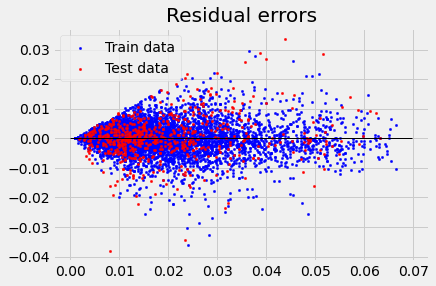

In [85]:
## K Nearest Neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# knn_model = KNeighborsRegressor(n_neighbors=3)
# knn_model.fit(X_train_scaled, y_train)

parameters = {"n_neighbors": range(1, 5)}
knn_model = GridSearchCV(KNeighborsRegressor(), parameters)
knn_model.fit(X_train_scaled, y_train)

print("Scores Training")
knn_model_scores = cross_validate_scores(knn_model, X_scaled, y)
for key in knn_model_scores:
    print(key + ": " + str(knn_model_scores[key]))


resid_plot(knn_model, X_train_scaled, X_test_scaled)

[0.01746344 0.01746344 0.01746344 ... 0.01746344 0.01746344 0.01746344]
Scores Training
[0.12178713 0.22983454 0.22158708 0.13297663 0.23363294 0.16809721
 0.36593676 0.4345162  0.1428513  0.48540095]
fit_time: 8.72086
score_time: 0.4201
test_explained_variance: 0.26836
test_neg_mean_absolute_error: -0.00704
test_neg_mean_squared_error: -0.0001
test_neg_root_mean_squared_error: -0.00946
test_neg_median_absolute_error: -0.00546
test_r2: 0.25366
adj_r2: 0.25253


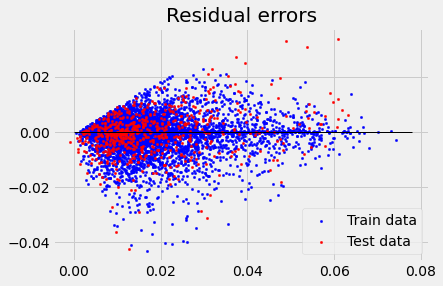

In [86]:
## SVM

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# parameters = {
#     "kernel": ["rbf"],
#     "C": [1,10,10,100,1000],
#     "gamma": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
#     
# }

# svm_reg = GridSearchCV(SVR(), parameters, cv=5, verbose=2)

svm_reg = SVR(kernel='rbf', gamma = 'auto', epsilon = .0001)
svm_reg.fit(X_train_scaled, y_train)
print(svm_reg.predict(X_train.values))

print("Scores Training")
svm_reg_scores = cross_validate_scores(svm_reg, X_scaled, y)
for key in svm_reg_scores:
    print(key + ": " + str(svm_reg_scores[key]))

resid_plot(svm_reg, X_train_scaled, X_test_scaled)

In [87]:
print(X_train.values)

[[1.50e-02 1.30e+01 2.70e+01 ... 2.90e+01 7.90e+01 1.80e+00]
 [1.90e-02 1.20e+01 2.30e+01 ... 3.50e+01 5.50e+01 5.50e+00]
 [2.00e-03 2.10e+01 4.10e+01 ... 2.67e+01 9.00e+01 0.00e+00]
 ...
 [2.80e-02 3.70e+01 6.50e+01 ... 2.36e+01 5.80e+01 0.00e+00]
 [4.80e-02 2.90e+01 5.40e+01 ... 2.85e+01 5.50e+01 0.00e+00]
 [1.70e-02 1.50e+01 2.80e+01 ... 3.12e+01 7.70e+01 0.00e+00]]


Scores Training
[ 0.27576892 -0.13856482 -0.33156359 -0.1609824  -0.57969429 -0.03293583
  0.39107896  0.56644428  0.55055557  0.59774491]
fit_time: 0.41501
score_time: 0.01069
test_explained_variance: 0.39093
test_neg_mean_absolute_error: -0.00799
test_neg_mean_squared_error: -9e-05
test_neg_root_mean_squared_error: -0.00954
test_neg_median_absolute_error: -0.00743
test_r2: 0.11379
adj_r2: 0.11245


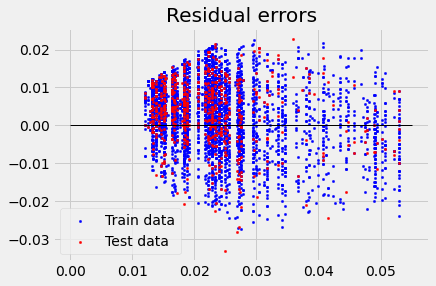

In [88]:
## AdaBoost

from sklearn.ensemble import AdaBoostRegressor


ada_boost_reg = AdaBoostRegressor(n_estimators=50)
ada_boost_reg.fit(X_train, y_train)

print("Scores Training")
ada_boost_reg_scores = cross_validate_scores(ada_boost_reg, X, y)
for key in ada_boost_reg_scores:
    print(key + ": " + str(ada_boost_reg_scores[key]))


resid_plot(ada_boost_reg, X_train, X_test)


Scores Training
[0.20808281 0.50853932 0.23493486 0.23983292 0.25231224 0.19723325
 0.54454578 0.63349409 0.55779425 0.64671625]
fit_time: 0.0684
score_time: 0.0087
test_explained_variance: 0.41709
test_neg_mean_absolute_error: -0.00621
test_neg_mean_squared_error: -7e-05
test_neg_root_mean_squared_error: -0.00822
test_neg_median_absolute_error: -0.00491
test_r2: 0.40235
adj_r2: 0.40145


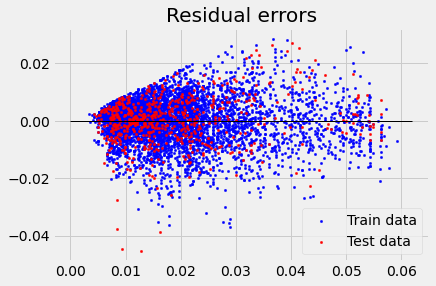

In [89]:
## XGBoost

import xgboost as xg

xgb_reg = xg.XGBRegressor(max_depth=2, n_estimators=40, verbosity = 0, random_state = 42)
xgb_reg.fit(X_train_scaled, y_train)

#Print Coefficients and Weight
# print("Coefficients: ")
# print("Intercept: " + str(ransac_reg.estimator_.intercept_))
# print(len(ransac_reg.estimator_.coef_))
# for i in range(len(X.columns)):
#     print(X.columns[i] + ": " + str(ransac_reg.estimator_.coef_[i]))

print("Scores Training")
xgb_reg_scores = cross_validate_scores(xgb_reg, X_scaled, y)
for key in xgb_reg_scores:
    print(key + ": " + str(xgb_reg_scores[key]))

resid_plot(xgb_reg, X_train_scaled, X_test_scaled)

In [98]:
## scores

sum_scores = {"Multiple Linear Regression": multi_reg_scores, "Polynomical Regression": poly_reg_scores, "RANSAC Regression": ransac_reg_scores, "Decision Tree Regression": decision_tree_reg_scores, "Random Forest Regression": random_forest_reg_scores, "KNN Regression": knn_model_scores, "SVM Regression": svm_reg_scores, "ADA Boost Regression": ada_boost_reg_scores, "XGB Regression": xgb_reg_scores}
targets = {"R^2 adjusted": "adj_r2"}

for target in targets:
    print(target)
    for key in sum_scores:
        print(key + ": " + str(sum_scores[key][targets[target]]))
    print()
    

R^2 adjusted
Multiple Linear Regression: 0.41693
Polynomical Regression: 0.37711
RANSAC Regression: 0.40195
Decision Tree Regression: 0.35797
Random Forest Regression: 0.41032
KNN Regression: 0.21246
SVM Regression: 0.25253
ADA Boost Regression: 0.11245
XGB Regression: 0.40145



In [99]:
### TESTING

yPredln = multi_lin_reg.predict(X_test_scaled)
# yPredkn = knRegressor.predict(X_test_scaled)
# yPredsvr = svrRegressor.predict(X_test_scaled)

predR2ln = str((round((r2_score(y_test,yPredln)), 3)))
# predR2kn = str((round((r2_score(y_test,yPredkn)), 3)))
# predR2svr = str((round((r2_score(y_test,yPredsvr)), 3)))

# print(predR2ln, predR2kn, predR2svr)

The R^2 value for Linear Regression is   : 0.544


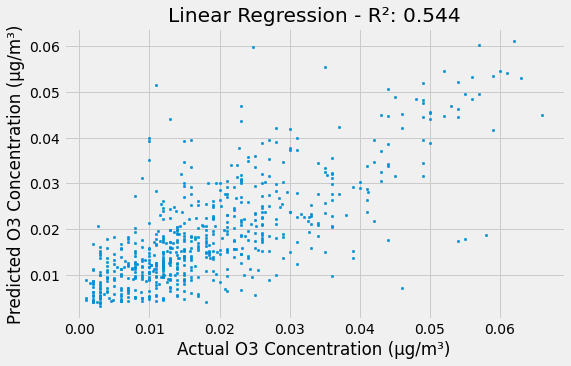

In [102]:
# ln reg


print('The R^2 value for Linear Regression is   :', round((r2_score(y_test,yPredln)), 3))
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
plt.scatter(y_test, yPredln, s= 6)

plt.xlabel('Actual O3 Concentration (µg/m³)')
plt.ylabel('Predicted O3 Concentration (µg/m³)')
plt.grid(b= True)
plt.title("Linear Regression - R²: %s" %predR2ln)
plt.show()


# print(len(X_test))
# print(len(yPredln))
# print(min(y_test), max(y_test))
# xspace = np.linspace(min(y_test), max(y_test), num = 1000)
# fig = plt.figure(figsize=(8, 5))
# ax1 = fig.add_subplot(111)
# plt.scatter(X_test.O3, y_test, s= 6)
# plt.scatter(xspace, multi_lin_reg.predict(xspace), s= 6)

# plt.xlabel('Actual O3 Concentration (µg/m³)')
# plt.ylabel('Predicted O3 Concentration (µg/m³)')
# plt.grid(b= True)
# plt.title("Linear Regression - R²: %s" %predR2ln)
# plt.show()


# # kn reg
# print('The R^2 value for KNN Regression is   :', round((r2_score(y_test,yPredkn)), 3))
# fig = plt.figure(figsize=(8, 5))
# ax1 = fig.add_subplot(111)
# plt.scatter(y_test, yPredkn, s= 6)

# plt.xlabel('Actual O3 Concentration (µg/m³)')
# plt.ylabel('Predicted O3 Concentration (µg/m³)')
# plt.grid(b= True)
# plt.title("KNN Regression - R²: %s" %predR2kn)
# plt.show()


# # svr reg
# print('The R^2 value for SVM Regression is   :', round((r2_score(y_test,yPredsvr)), 3))
# fig = plt.figure(figsize=(8, 5))
# ax1 = fig.add_subplot(111)
# plt.scatter(y_test, yPredsvr, s= 6)

# plt.xlabel('Actual O3 Concentration (µg/m³)')
# plt.ylabel('Predicted O3 Concentration (µg/m³)')
# plt.grid(b= True)
# plt.title("SVM Regression - R²: %s" %predR2svr)
# plt.show()